In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

def convolve(img, kernel, padding, stride):
  new_img = np.empty(shape = (img.shape[0] + 2 * padding, img.shape[1] + 2 * padding))

  for row in range(img.shape[0]):
    for col in range(img.shape[1]):
      new_img[row + padding][col + padding] = img[row][col]

  mod_img = np.empty(shape = (img.shape[0], img.shape[1]))

  for row in range(0, new_img.shape[0], stride):
    for col in range(0, new_img.shape[1], stride):
      if ((row + kernel.shape[0]) < new_img.shape[0] and (col + kernel.shape[1]) < new_img.shape[1]):
        temp = new_img[row: row + kernel.shape[0], col: col + kernel.shape[1]]
        temp_conv = temp * kernel
        mod_img[row + padding][col + padding] = np.mean(temp_conv)

  return mod_img


# Laplacian Filtering

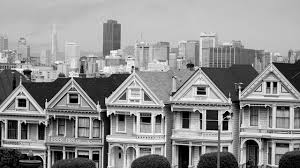

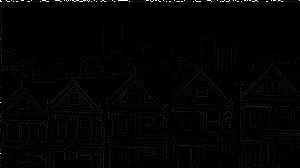

In [ ]:
img = cv2.imread("SanFrancisco.jpg", 0)
cv2_imshow(img)
cv2_imshow(convolve(img, np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]), 1, 1))

# Unsharp Mask followed by Highboost filtering

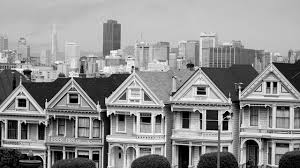

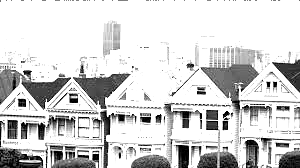

In [ ]:
cv2_imshow(img)
blur_img = convolve(img, np.array([[1 / 9, 1 / 9, 1 / 9], [1 / 9, 1 / 9, 1 / 9], [1 / 9, 1 / 9, 1 / 9]]), 1, 1)
temp_img = img - blur_img
temp_img = img + temp_img
cv2_imshow(temp_img)

# Roberts Operator

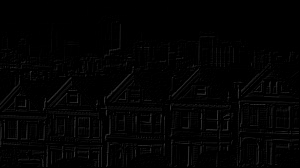

In [ ]:
def convolve_mod(img, kernel, padding, stride):
  new_img = np.zeros(shape = (img.shape[0] + 1, img.shape[1] + 1), dtype = np.float32)

  for row in range(img.shape[0]):
    for col in range(img.shape[1]):
      new_img[row][col] = img[row][col]

  mod_img = np.zeros(shape = (img.shape[0], img.shape[1]), dtype = np.float32)

  for row in range(0, img.shape[0], stride):
    for col in range(0, img.shape[1], stride):
      temp = new_img[row: row + kernel.shape[0], col: col + kernel.shape[1]]
      temp_conv = temp * kernel
      mod_img[row][col] = np.mean(temp_conv)

  return mod_img

cv2_imshow(convolve_mod(img, np.array([[-1, 0], [0, 1]]), 1, 1))

# Sobel Operator

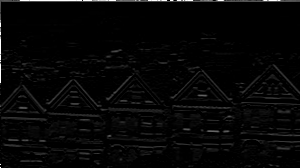

In [ ]:
cv2_imshow(convolve(img, np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]), 1, 1))